#MNIST

In [1]:
!pip install idx2numpy
!pip install scipy

In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import pickle
from scipy.sparse import csr_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_images_path = '/content/drive/MyDrive/USML/HW1/Prob_3/train-images.idx3-ubyte'
train_labels_path = '/content/drive/MyDrive/USML/HW1/Prob_3/train-labels.idx1-ubyte'
test_images_path = '/content/drive/MyDrive/USML/HW1/Prob_3/t10k-images.idx3-ubyte'
test_labels_path = '/content/drive/MyDrive/USML/HW1/Prob_3/t10k-labels.idx1-ubyte'

In [4]:
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

In [5]:
# 1. Combine data to get 70k images
all_imgs = np.concatenate((train_images, test_images), axis=0)

In [6]:
all_imgs.shape

(70000, 28, 28)

In [7]:
# 2. Flat all images
all_imgs_flat = all_imgs.reshape(all_imgs.shape[0], -1)

In [8]:
all_imgs_flat.shape

(70000, 784)

In [9]:
# 3. if pixel_val>0 -> 1
all_imgs_flat[all_imgs_flat > 0] = 1

In [10]:
all_labels = np.concatenate((train_labels, test_labels), axis=0)

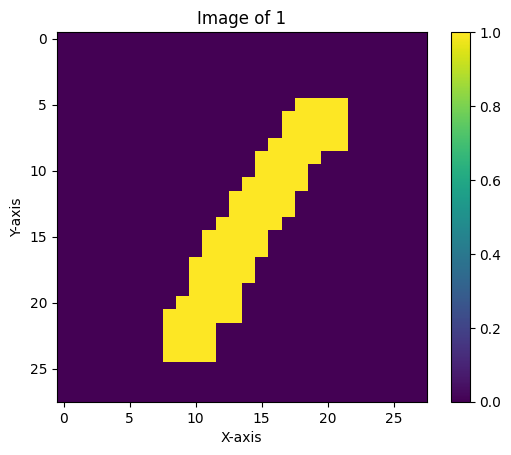

In [11]:
i = 3
plt.imshow(all_imgs_flat[i].reshape((28,28)), cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(f'Image of {all_labels[i]}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [12]:
sparse_imgs_flat = csr_matrix(all_imgs_flat)

In [13]:
sparse_imgs_flat.shape

(70000, 784)

In [14]:
dot_product = sparse_imgs_flat.dot(sparse_imgs_flat.T)

In [15]:
mag_arr = np.sum(all_imgs_flat, axis=1)

In [16]:
non_zero_values = dot_product.data

In [17]:
non_zero_values.shape

(4899999521,)

In [18]:
dot_product.shape

(70000, 70000)

## PROBLEM 4: MNIST, 20 NG : Train and test KNN classification (supervised)
Your goal in this problem is to write your own K-nearest neighbor (KNN) classifier.

For each of the two datasets, now in matrix format and with pairwise similarity computed, train and test a KNN classifier. You are required to implement KNN classification model yourself, though you may use support libraries / data-structures for the neighbor searching.

You should partition the datasets into (say) an 80/10/10 training/testing/validation sets. Note that the actual "training" here consists of simply identifying nearest neighbors---unlike other common classifiers, there is no iterative or gradient-based procedure.

Report both training performance and testing performance. If using Python, you are encouraged (but not required) to write a scikit-learn compatible *estimator* class supporting a common API interface, e.g. *.fit(), *.predict(), *.transform(), etc. See https://scikit-learn.org/stable/developers/develop.html for more details.

In [30]:
# for all images in test identify nearest neighbors in the set of training images

In [66]:
def cosine_similarity(idx1, idx2):
  row_at_idx = dot_product.getrow(idx1).toarray()
  dot_prod = row_at_idx[0][idx2]
  mag_1 = np.sqrt(mag_arr[idx1])
  mag_2 = np.sqrt(mag_arr[idx2])
  return dot_prod / (mag_1 * mag_2)




In [70]:
print(cosine_similarity(0, 0),train_labels[0], train_labels[0])

0.9999999999999998 5 5


In [71]:
print(cosine_similarity(3, 23),train_labels[3], train_labels[23])

0.911007250534438 1 1


In [72]:
print(cosine_similarity(3, 2),train_labels[3], train_labels[2])

0.24224069756247724 1 4


In [87]:
# train = 0 - 55,999 ; val = 56,000 - 62,999 ; test = 63,000 - 69,999

In [106]:
def predict(idx, k=10):
  heap = []
  for i in range(100): ###
    curr_cos_sim = cosine_similarity(idx, i)
    if len(heap) == 0:
      heap.append([curr_cos_sim,i])
    else:
      if (heap[0][0]<curr_cos_sim):
        heap.insert(0, [curr_cos_sim,i])
      else:
        heap.append([curr_cos_sim,i])
        heap.sort(key=lambda x: x[0],reverse=True)
      if(len(heap)>k):
        heap.pop(-1)

  # reporting most frequent label
  d = {}
  for i in range(k):
    if train_labels[heap[i][1]] in d:
      d[train_labels[heap[i][1]]] += 1
    else:
      d[train_labels[heap[i][1]]] = 1
  return max(d, key=d.get)


In [110]:
# Evaluating train
correct = 0
for i in range(100): ####
  if(predict(i) == all_labels[i]):
    correct += 1
print(f'Training Accuracy: {(correct/100)*100}') ####

Training Accuracy: 85.0


In [112]:
# Evaluating Validation
correct = 0
for i in range(56000,56100): ####
  if(predict(i) == all_labels[i]):
    correct += 1
print(f'Validation Accuracy: {(correct/100)*100}') ####

Validation Accuracy: 59.0


In [113]:
# Evaluating Test
correct = 0
for i in range(63000,63100): ####
  if(predict(i) == all_labels[i]):
    correct += 1
print(f'Test Accuracy: {(correct/100)*100}') ####

Test Accuracy: 65.0
